In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 파일 불러오기

In [2]:
import pandas as pd

In [3]:
claim = pd.read_excel('1,2회 통합본2.xlsx')

## 문장 번호를 기준으로 리스트 묶기

In [4]:
claim = claim[['문장번호', '단어', 'BIO']]

In [5]:
claim

,문장번호,단어,BIO
0,1,1,O
1,1,.,O
2,1,카트로봇,B_TRM
3,1,을,O
4,1,이동,O
...,...,...,...
837514,76,를,O
837515,76,위한,O
837516,76,이동통신단말기,B_TRM
837517,76,의,O


In [6]:
claim.dtypes

문장번호     int64
단어      object
BIO     object
dtype: object

In [7]:
print('문장열의 중복을 제거한 값의 개수 : {}'.format(claim.문장번호.nunique()))
print('단어열의 중복을 제거한 값의 개수 : {}'.format(claim.단어.nunique()))
print('BIO열의 중복을 제거한 값의 개수 : {}'.format(claim.BIO.nunique()))

문장열의 중복을 제거한 값의 개수 : 1953
단어열의 중복을 제거한 값의 개수 : 13480
BIO열의 중복을 제거한 값의 개수 : 3


In [8]:
print('BIO 열의 각각의 값의 개수 카운트')
print('================================')
print(claim.groupby('BIO').size().reset_index(name='count'))

BIO 열의 각각의 값의 개수 카운트
     BIO   count
0  B_TRM   82607
1  I_TRM   70647
2      O  684265


# 특허 데이터를 리스트로 변환

In [9]:
claim_list = claim.values.tolist()

In [10]:
len(claim_list)

837519

# 단어를 문장 단위로 묶어주기 위한 코드

In [11]:
claim_middle = []
claim_middle.append(claim_list[0][1:])
claim_middle

[['1', 'O']]

## 문장 번호를 기준으로 묶기

In [12]:
claim_list2 = []
for i in range(len(claim_list)-1):
    if claim_list[i][0] == claim_list[i+1][0]:
        claim_middle.append(claim_list[i+1][1:])
    else:
        claim_list2.append(claim_middle)
        claim_middle=[]
        claim_middle.append(claim_list[i+1][1:])
claim_list2.append(claim_middle)

In [13]:
claim_list2[-1]

[['상기', 'O'],
 ['확인', 'O'],
 ['부', 'O'],
 ['에서', 'O'],
 ['확인', 'O'],
 ['된', 'O'],
 ['사용자', 'B_TRM'],
 ['의', 'O'],
 ['신분', 'O'],
 ['을', 'O'],
 ['공개', 'O'],
 ['하', 'O'],
 ['는', 'O'],
 ['신분', 'O'],
 ['공개', 'O'],
 ['부', 'O'],
 ['를', 'O'],
 ['더', 'O'],
 ['포함', 'O'],
 ['함', 'O'],
 ['을', 'O'],
 ['특징', 'O'],
 ['으로', 'O'],
 ['하', 'O'],
 ['는', 'O'],
 ['홈', 'B_TRM'],
 ['네트워크', 'I_TRM'],
 ['의', 'O'],
 ['가전기기', 'B_TRM'],
 ['제어', 'O'],
 ['를', 'O'],
 ['위한', 'O'],
 ['이동통신단말기', 'B_TRM'],
 ['의', 'O'],
 ['인증시스템', 'B_TRM']]

In [14]:
len(claim_list2)

14990

# 가끔가다 숫자가 문자로 인식 안되고 에러남. 따라서 문자가 아닌경우, 문자로 바꿔주는 작업 필요

In [15]:
for i in range(len(claim_list2)):
    for j in range(len(claim_list2[i])):
        if type(claim_list2[i][j][0]) != str:
            claim_list2[i][j][0] = str(claim_list2[i][j][0])

In [16]:
claim_list2[:10]

[[['1', 'O'],
  ['.', 'O'],
  ['카트로봇', 'B_TRM'],
  ['을', 'O'],
  ['이동', 'O'],
  ['시키', 'O'],
  ['는', 'O'],
  ['이', 'O'],
  ['동부', 'O']],
 [['카트로봇', 'B_TRM'],
  ['의', 'O'],
  ['주변', 'O'],
  ['에', 'O'],
  ['배치', 'O'],
  ['된', 'O'],
  ['장애물', 'O'],
  ['을', 'O'],
  ['센싱', 'B_TRM'],
  ['하', 'O'],
  ['는', 'O'],
  ['장애물', 'B_TRM'],
  ['센서', 'I_TRM']],
 [['카트로봇', 'B_TRM'],
  ['의', 'O'],
  ['주', 'O'],
  ['행면', 'O'],
  ['또는', 'O'],
  ['상기', 'O'],
  ['주', 'O'],
  ['행면', 'O'],
  ['의', 'O'],
  ['측면', 'O'],
  ['에', 'O'],
  ['배치', 'O'],
  ['된', 'O'],
  ['마커', 'B_TRM'],
  ['를', 'O'],
  ['촬영', 'O'],
  ['하', 'O'],
  ['는', 'O'],
  ['카메라', 'B_TRM'],
  ['센서', 'I_TRM']],
 [['상기', 'O'],
  ['카트로봇', 'B_TRM'],
  ['의', 'O'],
  ['핸들', 'B_TRM'],
  ['어셈블리', 'I_TRM'],
  ['에', 'O'],
  ['가해진', 'O'],
  ['힘', 'O'],
  ['의', 'O'],
  ['변화', 'O'],
  ['를', 'O'],
  ['센싱', 'B_TRM'],
  ['하', 'O'],
  ['는', 'O'],
  ['포스', 'B_TRM'],
  ['센서', 'I_TRM']],
 [['및', 'O'],
  ['상기', 'O'],
  ['카메라', 'B_TRM'],
  ['센서', 'I_TRM'],
  ['가', 'O'

훈련을 위해 단어와 태깅 정보를 분리시켜야 하기 때문에 zip 함수를 사용함

In [17]:
sentences, ner_tags = [], [] 
for tagged_sentence in claim_list2: # claim_list2를 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 단어들은 sentence에 개체명 태깅 정보들은 tag_info에 저장.
    sentences.append(list(sentence)) #단어 정보만 저장한다.
    ner_tags.append(list(tag_info)) # 개체명 태깅 정보만 저장한다.

In [18]:
print(sentences[99])
print(ner_tags[99])

['및', '상기', '단말', '이', '상기', '캐릭터', '의', '변형', '된', '동작', '을', '영상', '으로', '디스플레이', '하', '는', '단계', '를', '포함', '하', '는', ',', '로봇', '시스템', '제어방법', '.']
['O', 'O', 'B_TRM', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_TRM', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B_TRM', 'I_TRM', 'B_TRM', 'O']


## 데이터의 길이 분포 확인

샘플의 최대 길이 : 497
샘플의 평균 길이 : 55.871848


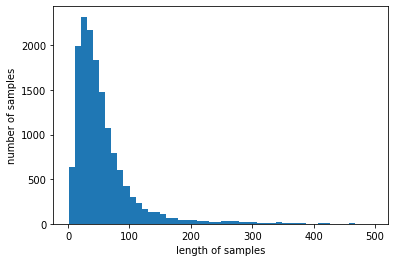

In [19]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## 토크나이저를 통한 정수 인코딩
Bi-LSTM 실험과 다르게 문장 데이터의 모든 단어들을 사용함

In [68]:
src_tokenizer = Tokenizer(oov_token='OOV') # 모든 단어를 사용하지만 인덱스 1에는 단어 'OOV'를 할당한다.
src_tokenizer.fit_on_texts(sentences)
tar_tokenizer = Tokenizer(lower=False) # 태깅 정보들은 내부적으로 대문자를 유지한채로 저장
tar_tokenizer.fit_on_texts(ner_tags)

문장 데이터에 대해서는 src_tokenizer를, 레이블에 해당되는 개체명 태깅 정보에 대해서는 tar_tokenizer를 사용합니다.

In [69]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 13004
개체명 태깅 정보 집합의 크기 : 4


앞서 src_tokenizer를 만들때 Tokenizer의 인자로 oov_token='OOV'를 선택했습니다. 이렇게 하면 인덱스1에 단어 'OOV'가 할당됩니다.

In [70]:
print('단어 OOV의 인덱스 : {}'.format(src_tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


### 정수 인코딩 수행

In [71]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

이제 문장 데이터에 대해서 정수 인코딩이 수행된 결과는 X_train, 개체명 태깅 데이터에 대해서 정수 인코딩이 수행된 결과는 y_train에 저장되었습니다. 정수 인코딩이 되었는지 확인을 위해 임의로 첫번째 샘플을 출력해보겠습니다.

In [72]:
print(X_train[0])
print(y_train[0])

[16, 15, 1067, 9, 93, 100, 4, 27, 906]
[1, 1, 2, 1, 1, 1, 1, 1, 1]


모델 훈련 후 결과 확인을 위해 인덱스로부터 단어를 리턴하는 index_to_word를 만듭니다. 그와 동시에 뒤에서 사용할 index_to_ner도 만듭니다. 이때, 인덱스 0은 'PAD'란 단어를 할당해두겠습니다. index_to_ner은 개수가 적으니 출력까지 해봅시다.

In [73]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word
index_to_ner[0]='PAD'

In [74]:
index_to_word

{1: 'OOV',
 2: '상기',
 3: '하',
 4: '는',
 5: ',',
 6: '의',
 7: '에',
 8: '를',
 9: '을',
 10: '제',
 11: ')',
 12: '(',
 13: '되',
 14: '된',
 15: '.',
 16: '1',
 17: '있',
 18: '으로',
 19: '여',
 20: '항',
 21: '및',
 22: '포함',
 23: '어서',
 24: '고',
 25: '단계',
 26: '정보',
 27: '이',
 28: '데이터',
 29: '가',
 30: '2',
 31: '한',
 32: '와',
 33: '로',
 34: '특징',
 35: '것',
 36: '에서',
 37: '은',
 38: '부',
 39: '장치',
 40: '방법',
 41: '과',
 42: '하나',
 43: '들',
 44: '도록',
 45: '시스템',
 46: '생성',
 47: '며',
 48: '중',
 49: '로봇',
 50: '서비스',
 51: '제공',
 52: '사용자',
 53: '서버',
 54: '또는',
 55: '학습',
 56: '기',
 57: '3',
 58: '복수',
 59: '인',
 60: '대한',
 61: '위치',
 62: '제어',
 63: '이용',
 64: '로부터',
 65: '적어도',
 66: '저장',
 67: '어',
 68: '클라우드',
 69: '영상',
 70: '값',
 71: '입력',
 72: '각각',
 73: '설정',
 74: '4',
 75: '위한',
 76: '기반',
 77: '사용',
 78: '더',
 79: '분석',
 80: '5',
 81: '이미지',
 82: '이상',
 83: '구성',
 84: '가능',
 85: '모듈',
 86: '수신',
 87: '단말',
 88: '따라',
 89: '통해',
 90: '수행',
 91: '연결',
 92: '적',
 93: '이동',
 94: '형성',
 95: '

In [75]:
index_to_ner

{1: 'O', 2: 'B_TRM', 3: 'I_TRM', 0: 'PAD'}

## 디코딩 해보기

index_to_word를 만들었으니 시험삼아 첫번째 샘플에 대해서 다시 디코딩(정수에서 다시 텍스트 데이터로 변환) 작업을 해보겠습니다.

In [76]:
decoded = []
for index in X_train[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_word[index]) # 다시 단어로 변환

print('기존의 문장 : {}'.format(sentences[0]))
print('디코딩 문장 : {}'.format(decoded))

기존의 문장 : ['1', '.', '카트로봇', '을', '이동', '시키', '는', '이', '동부']
디코딩 문장 : ['1', '.', '카트로봇', '을', '이동', '시키', '는', '이', '동부']


이제 X 데이터와 y 데이터가 구성되었습니다. 이제 패딩 작업을 진행해봅시다.   
가장 긴 문장은 539이기 때문에 max_len을 539로 지정

In [77]:
max_len = 497
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
# X_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
# y_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자0으로 채움.

# 훈련데이터와 테스트 데이터 나누기

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

### 데이터 크기 확인

In [79]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (11992, 497)
훈련 샘플 레이블의 크기 : (11992, 497)
테스트 샘플 문장의 크기 : (2998, 497)
테스트 샘플 레이블의 크기 : (2998, 497)


# 단어 임베딩 모델 불러오는 부분

In [80]:
from gensim.models import FastText
model2 = FastText.load('claim_all_fasttext2.model')
fst = model2.wv

In [81]:
fst['상기']

array([-3.67773548e-02,  5.69983274e-02,  1.29048944e-01,  4.71413322e-03,
       -1.75538324e-02,  1.11175478e-02, -1.99306570e-02, -1.92345846e-02,
        1.13591909e-01, -1.13923848e-02,  3.18314433e-02,  6.65994361e-03,
       -9.49956477e-04, -7.61165097e-03,  1.00160792e-01,  6.57837391e-02,
        7.29813147e-03, -4.07714397e-03, -4.24512476e-03, -8.37538615e-02,
       -6.34456426e-02, -1.40355781e-01,  9.06899869e-02, -1.23426914e-02,
       -1.17868796e-01,  1.12263076e-02,  1.97198987e-03,  1.31126419e-02,
        6.75056726e-02, -7.89541230e-02,  3.15504447e-02, -1.18110940e-01,
       -6.34004129e-03, -1.56617258e-02, -4.97614965e-02, -3.43460478e-02,
        5.48636243e-02,  5.54934843e-03, -7.65400827e-02,  1.02983505e-01,
       -3.60843576e-02,  2.93336287e-02,  3.70531902e-03,  8.52622390e-02,
       -4.71495800e-02, -4.73834164e-02, -9.02180001e-02,  1.23885006e-01,
       -2.61496827e-02, -2.73582730e-02, -2.58658379e-02,  9.13926437e-02,
       -8.23007673e-02, -

In [82]:
def get_vector(word):
    if word in fst:
        return fst[word]
    else:
        return None

In [83]:
# 새로운 단어 벡터 배열
em_mat = np.zeros((vocab_size, 300))

for i, word in index_to_word.items():
    temp = get_vector(word)
    if temp is not None:
        em_mat[i] = temp

In [84]:
em_mat

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.74424087e-04, -6.75485411e-04,  3.43128428e-04, ...,
         4.18029726e-04, -7.86611577e-04, -1.35755248e-03],
       [-3.67773548e-02,  5.69983274e-02,  1.29048944e-01, ...,
        -3.95209566e-02, -1.08907886e-01,  1.68032181e-02],
       ...,
       [-5.76488487e-02, -5.64881302e-02,  4.54074368e-02, ...,
         4.49968390e-02, -5.10991402e-02,  6.87983260e-02],
       [ 4.53272611e-02,  5.22165783e-02, -8.02659914e-02, ...,
        -8.08418766e-02, -5.41441441e-02, -1.72779281e-02],
       [-1.95531035e-03, -4.55233123e-04,  1.58158003e-03, ...,
         1.78879686e-03,  2.10902377e-04, -5.16253822e-05]])

In [85]:
em_mat.shape

(13004, 300)

# 양방향 LSTM + CRF를 이용한 개체명 인식

In [86]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers import CRF

## 정수 인코딩된 태그를 다시 태깅 정보로 변경

In [87]:
def sequences_to_tag(sequences): # 예측값을 index_to_tag를 사용하여 태깅 정보로 변경하는 함수.
    result = []
    for sequence in sequences: # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
        temp = []
        for pred in sequence: # 시퀀스로부터 예측값을 하나씩 꺼낸다.
            pred_index = np.argmax(pred) # 예를 들어 [0, 0, 1, 0 ,0]라면 1의 인덱스인 2를 리턴한다.
            temp.append(index_to_ner[pred_index].replace("PAD", "O"))
        result.append(temp)
    return result

모델에 양방향 LSTM을 사용하고 모델의 출력층에 CRF층을 배치

In [88]:
# 모델 생성
y_train = to_categorical(y_train, num_classes=tag_size)
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=300, weights=[em_mat], input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(units=256, return_sequences=True, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(50, activation="relu")))
crf = CRF(tag_size)
model.add(crf)
model.compile(optimizer="Adam", loss=crf.loss_function, metrics=[crf.accuracy])

# 학습
model.fit(X_train, y_train, batch_size=32, epochs=12, validation_split=0.1, verbose=1) 

/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/spark/sebin/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 10792 samples, validate on 1200 samples
Epoch 1/12
10792/10792 [==============================] - 567s 53ms/step - loss: 21.8308 - crf_viterbi_accuracy: 0.9201 - val_loss: 22.3791 - val_crf_viterbi_accuracy: 0.9477
Epoch 2/12
10792/10792 [==============================] - 564s 52ms/step - loss: 21.7247 - crf_viterbi_accuracy: 0.9588 - val_loss: 22.3508 - val_crf_viterbi_accuracy: 0.9588
Epoch 3/12
10792/10792 [==============================] - 562s 52ms/step - loss: 21.6980 - crf_viterbi_accuracy: 0.9681 - val_loss: 22.3403 - val_crf_viterbi_accuracy: 0.9623
Epoch 4/12
10792/10792 [==============================] - 562s 52ms/step - loss: 21.6803 - crf_viterbi_accuracy: 0.9745 - val_loss: 22.3355 - val_crf_viterbi_accuracy: 0.9640
Epoch 5/12
10792/10792 [==============================] - 562s 52ms/step - loss: 21.6689 - crf_viterbi_accuracy: 0.9783 - val_loss: 22.3332 - val_crf_viterbi_accuracy: 0.9662
Epoch 6/12
10792/10792 [==============================] - 562s 52ms/step - l

# 테스트 (B, I 계산)

In [89]:
y_test = to_categorical(y_test, num_classes=tag_size)

In [90]:
y_predicted = model.predict(X_test)
# 학습된 모델을 사용하여 출력된 예측 개체명
pred_tags = sequences_to_tag(y_predicted)
# 정답 개체명
test_tags = sequences_to_tag(y_test)

In [44]:
test_tags[0]

['O',
 'O',
 'O',
 'O',
 'O',
 'B_AFW',
 'I_AFW',
 'O',
 'B_TRM',
 'I_TRM',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B_AFW',
 'I_AFW',
 'I_AFW',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B_AFW',
 'I_AFW',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O'

In [45]:
pred_tags[0]

['O',
 'O',
 'O',
 'O',
 'O',
 'B_AFW',
 'I_AFW',
 'O',
 'B_TRM',
 'I_TRM',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',


In [51]:
len(pred_tags)

1979

# 정확도 계산하는 부분

In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
import time

start = time.time()

# 필요없어.....
acc = []
accuracy = []

# 중간 결과 저장하는 리스트
mid_pred = []
mid_test=[]

# 최종 결과 저장하는 리스트
real_pred=[]
real_test=[]

# 정확도 계산 결과 저장
precision = []
recall = []
f1 = []

# 1차원 리스트로 변환
pred_tags = sum(pred_tags, [])
test_tags = sum(test_tags, [])

# 혼동행렬값 저장하는 리스트
tp = []
fp = []
fn = []


for i in range(len(test_tags)-1):
    if test_tags[i][0] != 'O':
        mid_pred.append(pred_tags[i])
        mid_test.append(test_tags[i])
        
        if test_tags[i+1][0] != 'I':
            real_pred.append(mid_pred)
            mid_pred = []
            real_test.append(mid_test)
            mid_test = []
            
    else:
        real_pred.append(pred_tags[i])
        real_test.append(test_tags[i])

if len(mid_pred) != 0 and len(mid_test) != 0:       
    real_pred.append(mid_pred)
    real_test.append(mid_test)


for i in range(len(real_test)):
    if type(real_test[i]) == list:
        if real_test[i] == real_pred[i]:
            tp.append('tp')
        else:
            fn.append('fn')
    elif type(real_test[i]) == str:
        if real_test[i][0] == 'O' and (real_pred[i][0] == 'B' or real_pred[i][0]=='I'):
            fp.append('fp')

            
precision.append(len(tp)/(len(tp)+len(fp)))
recall.append(len(tp)/(len(tp)+len(fn)))
f1.append(2*precision[-1]*recall[-1]/(recall[-1]+precision[-1]))

# 전체 검증 결과 출력
print('\nK-fold cross validation Accuracy: {}'.format(accuracy))
end = time.time() - start
print(end)


K-fold cross validation Accuracy: []
59.2920708656311


In [98]:
f1

[0.8755941015256943]

In [102]:
recall

[0.8674685062987403]

In [94]:
precision

[0.8838733613653228]